  # **AI-Driven Loan Default Prediction**
## **Business Context**

Financial institutions face significant challenges in assessing credit risk when issuing loans. A high default rate can lead to massive financial losses and impact lending decisions. Traditional risk assessment methods rely on credit scores and manual reviews, which can be time-consuming and prone to inaccuracies.

With advancements in AI and machine learning, banks and financial institutions can now leverage predictive models to analyze loan applicants' financial behavior and assess their risk of default with higher accuracy and efficiency.

## **Problem Statement**
The goal of this project is to build an AI-powered system that predicts loan defaults using historical loan data. By analyzing customer features such as credit history, income, employment status, and past loan behavior, our system will classify borrowers into high-risk (default) and low-risk (non-default) categories.

This predictive capability helps lenders make data-driven decisions, reduce financial risks, and improve overall loan approval processes.


## **Project Goals**
Develop an AI-powered loan default prediction model to classify borrowers as default or non-default.
Use machine learning algorithms such as Logistic Regression, Random Forest, and XGBoost and evaluate their performance.
Implement feature engineering and data preprocessing techniques to improve model accuracy.
Perform cross-validation and hyperparameter tuning to optimize model performance.
Achieve a high recall score to minimize the risk of misclassifying defaulters as non-defaulters.
Provide business insights based on model predictions for better decision-making.

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Loading the dataset

In [3]:
df = pd.read_csv('LoanDataset.csv', encoding='utf-8') 

## **Data Exploration**

In [4]:
# Displaying first 3 rows of the dataset
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [5]:
# Getting dataset summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
# Getting statistical summary of numerical columns
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
# Get list of column names
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [8]:
# Dropping unnecessary columns
df.drop(['address','issue_d','title','earliest_cr_line'], axis=1 , inplace = True )

#### **Key Observations**
Certain columns like address, issued_date, title, and earliest_credit_line were not useful for prediction, so they were removed.


##### **Data Type Correction**

In [9]:
df.dtypes


loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object

In [10]:
# Convert categorical features to category type
categorical_cols = ['term', 'grade', 'sub_grade', 'verification_status', 'home_ownership', 'initial_list_status', 'application_type',
                    'loan_status','purpose', 'emp_title']
for col in categorical_cols : 
   df[col] =  df[col].astype('category')

In [11]:
# Remove dollar sign ($) and convert 'loan_amount' to numerical
df['loan_amnt'] = df['loan_amnt'].replace({r'\$' : '' , ',' : ''} , regex = True).astype(float)


In [12]:
# Verifying data type changes
df.dtypes

loan_amnt                float64
term                    category
int_rate                 float64
installment              float64
grade                   category
sub_grade               category
emp_title               category
emp_length                object
home_ownership          category
annual_inc               float64
verification_status     category
loan_status             category
purpose                 category
dti                      float64
open_acc                 float64
pub_rec                  float64
revol_bal                float64
revol_util               float64
total_acc                float64
initial_list_status     category
application_type        category
mort_acc                 float64
pub_rec_bankruptcies     float64
dtype: object

#### **Key Fixes**

- Converted categorical features to category type.
- Removed dollar signs from numerical columns like loan_amount.
- Checked the updated data types to confirm the changes.

#### **Understand Missing Data**

In [13]:
# Checking missing values count
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

#### **Missing Values Found**
Feature	Missing Count
- employee_title	22,927
- employee_length	18,301
- revol_util	276
- mort_acc	37,795
- pub_rec_bankruptcies	535

In [14]:
# Checking missing value percentage
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
loan_amnt               0.000000
purpose                 0.000000
term                    0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
loan_status             0.000000
dtype: float64

- Calculated missing percentage to decide how to handle them.

##### defining colors

In [15]:
color1 = '#7D0DC3'
color2 = '#D397F8'

## **Exploratory Data Analysis**

#### **Heatmap for missing values**

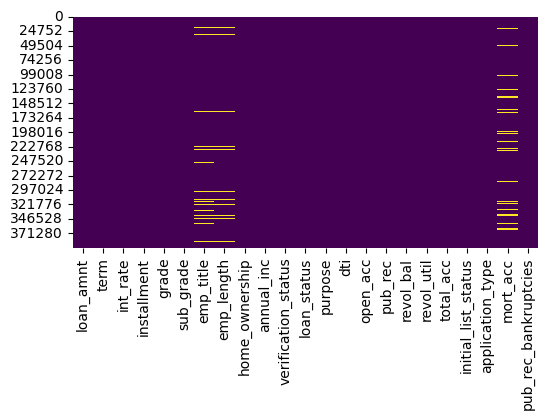

In [16]:
plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

 #### **Loan Count by Grade (Charged Off vs. Fully Paid)**

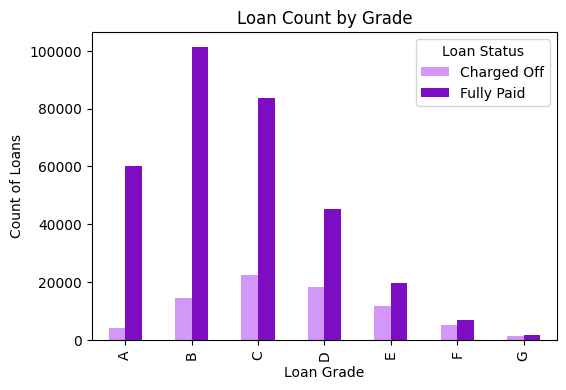

In [17]:
stacked_data = df.groupby(['grade', 'loan_status'] , observed=True).size().unstack(fill_value=0)

ax = stacked_data.plot(kind='bar' , figsize=(6, 4) , color = [color2, color1])
plt.title("Loan Count by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Count of Loans")
plt.legend(title="Loan Status")
ax.set_facecolor(color='white')
plt.show()

- **Observation:**
     - Higher grades (A, B) show more loans that are Fully Paid, while lower grades (F, G) have a relatively higher share of Charged Off loans.
 
- **Implication:**
    - Loan grade appears correlated with default risk; better grades generally correspond to fewer defaults.

#### **Count of Loans by Grade, Home Ownership, and Application Type**

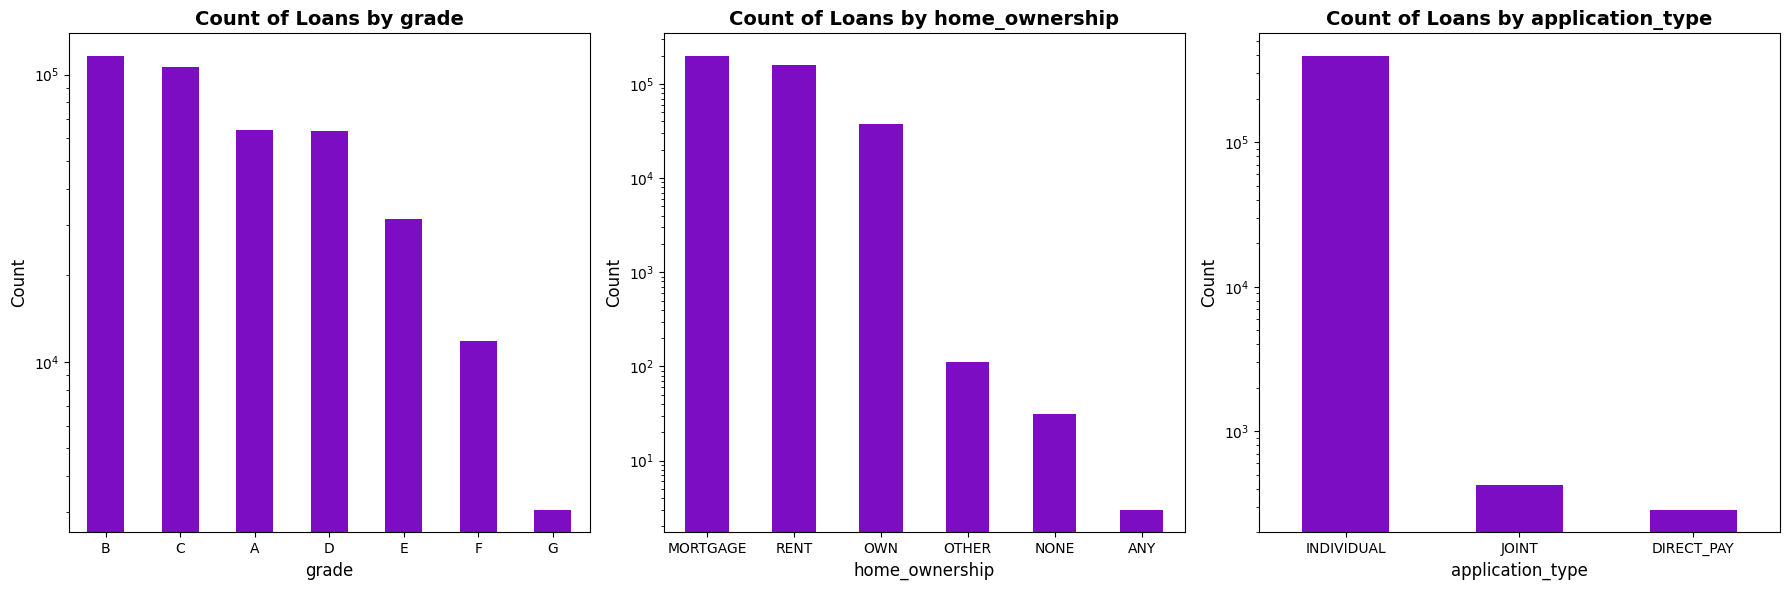

In [18]:
# List of important categorical columns
imp_columns = ['grade','home_ownership', 'application_type']

# Create subplots: one row with as many columns as we have important columns
fig, axes = plt.subplots(1, len(imp_columns), figsize=(6 * len(imp_columns), 6))

# for ax, col in zip(axes, imp_columns):

#     df_cleaned[col].value_counts().plot(kind='bar', ax=ax, color=color2)
#     ax.set_title(f'Count of Loans by {col}', fontsize=14, fontweight='bold')
#     ax.set_xlabel(col, fontsize=12)
#     ax.set_ylabel("Count", fontsize=12)
#     ax.tick_params(axis='x', rotation=45)
#    ax.set_yscale('log')  

                   # OR

for i, col in enumerate(imp_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color=color1)
    axes[i].set_title(f'Count of Loans by {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].set_yscale('log')  

plt.tight_layout()
plt.show()

- **Grade:** 
    - Grades B and C may have the highest number of loans, suggesting a concentration in mid-tier credit segments.
 
- **Home Ownership:**
     - MORTGAGE and RENT dominate, indicating most borrowers either rent or have a mortgage.
 
- **Application Type:** 
    - INDIVIDUAL applications form the majority, with JOINT and DIRECT_PAY being smaller segments.
 
- **Implication:** 
    - These distributions highlight potential imbalances, some categories dominate the dataset, which could affect model training.

#### **Annual Income Distribution by Loan Grade**

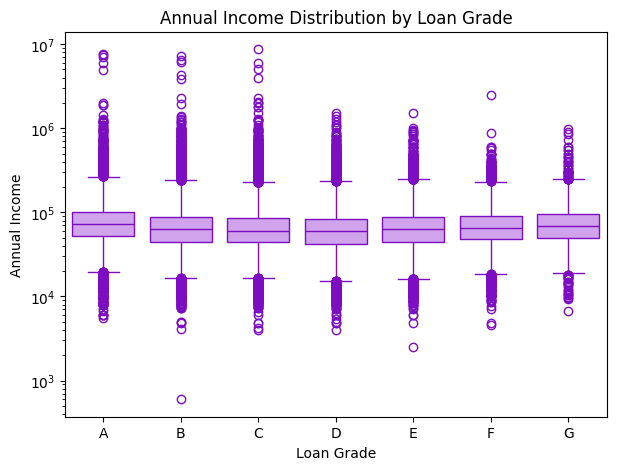

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(x='grade', y='annual_inc', data=df, linecolor = color1 , color = color2 , log_scale= True)
plt.title("Annual Income Distribution by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Annual Income")
plt.show()           

 - **Observation:**
     - Borrowers in higher grades (A, B) often have higher median incomes, but there’s considerable overlap among all grades.

- **Implication:** 
   - While income influences loan grade, it’s not the sole factor, there are outliers and overlaps indicating other variables also play a role.

 #### **Box Plot of Numeric Features**

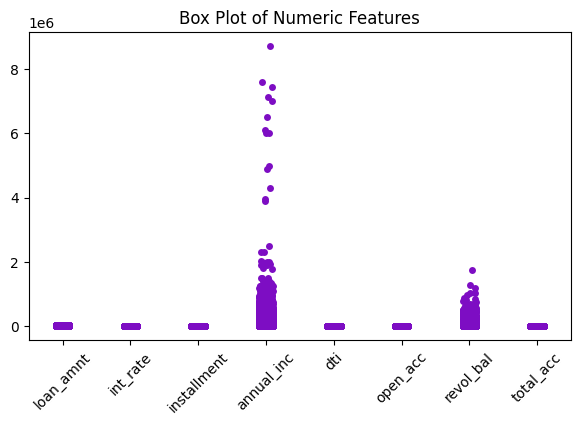

In [20]:
plt.figure(figsize=(7,4))
sns.stripplot(data=df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc']] , color=color1)
plt.xticks(rotation=45)
plt.title("Box Plot of Numeric Features")
plt.show()

 - **Observation:** 
     -  Several features (annual_inc, revol_bal) show large outliers, indicating skewed distributions or extreme values.
 
- **Implication:**  
    - Outlier handling is necessary to prevent model bias and improve performance.

#### **Distribution of Numeric Columns**

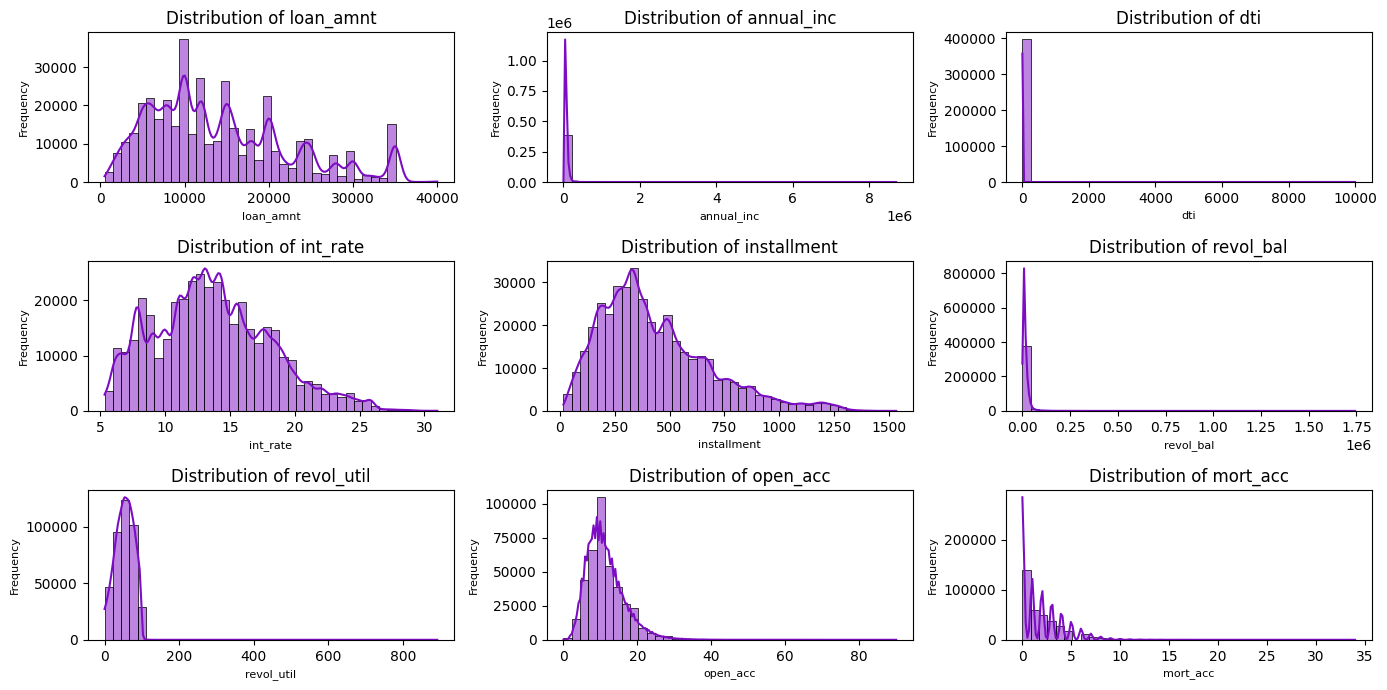

In [21]:
selected_cols = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'installment', 'revol_bal', 'revol_util', 'open_acc', 'mort_acc']  

fig, axes = plt.subplots(3, 3, figsize=(14, 7))
axes = axes.flatten() 

for i, col in enumerate(selected_cols):
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i], color=color1)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)

for j in range(i+1, len(axes)):  
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()
plt.show()

- **Loan Amount** (`loan_amnt`):
   - Mostly unimodal, but with a tail indicating larger loan amounts.
- **Annual Income** (`annual_inc`):
   - Heavily right-skewed; a few borrowers have extremely high incomes.
- **Debt-to-Income Ratio** (`dti`):
   - Centered around lower values, but some borrowers have high DTI, suggesting higher risk.
 - **Interest Rate** (`int_rate`):
   - Clusters around mid-to-high teens, with fewer loans at very high or very low rates.
- **Installment** (`installment`):
   - Right-skewed; most installments cluster in a lower range, with a tail of higher monthly payments.
- **Revolving Balance** (`revol_bal`):
   - Shows a long right tail, indicating some borrowers carry very high balances.
- **Revolving Utilization** (`revol_util`):
   - Tends to be skewed, with some borrowers using a high percentage of available credit.
- **Open Accounts** (`open_acc`):
   - Most borrowers have a moderate number of open accounts, but some have many.
- **Mortgage Accounts** (`mort_acc`):
   - Many borrowers have few or no mortgage accounts; a smaller group has multiple.
- **Implication:** Many numeric features are right-skewed and contain outliers, suggesting potential transformations (log) or outlier treatment before modeling.

#### **Pairwise Relationships Among Loan Features**

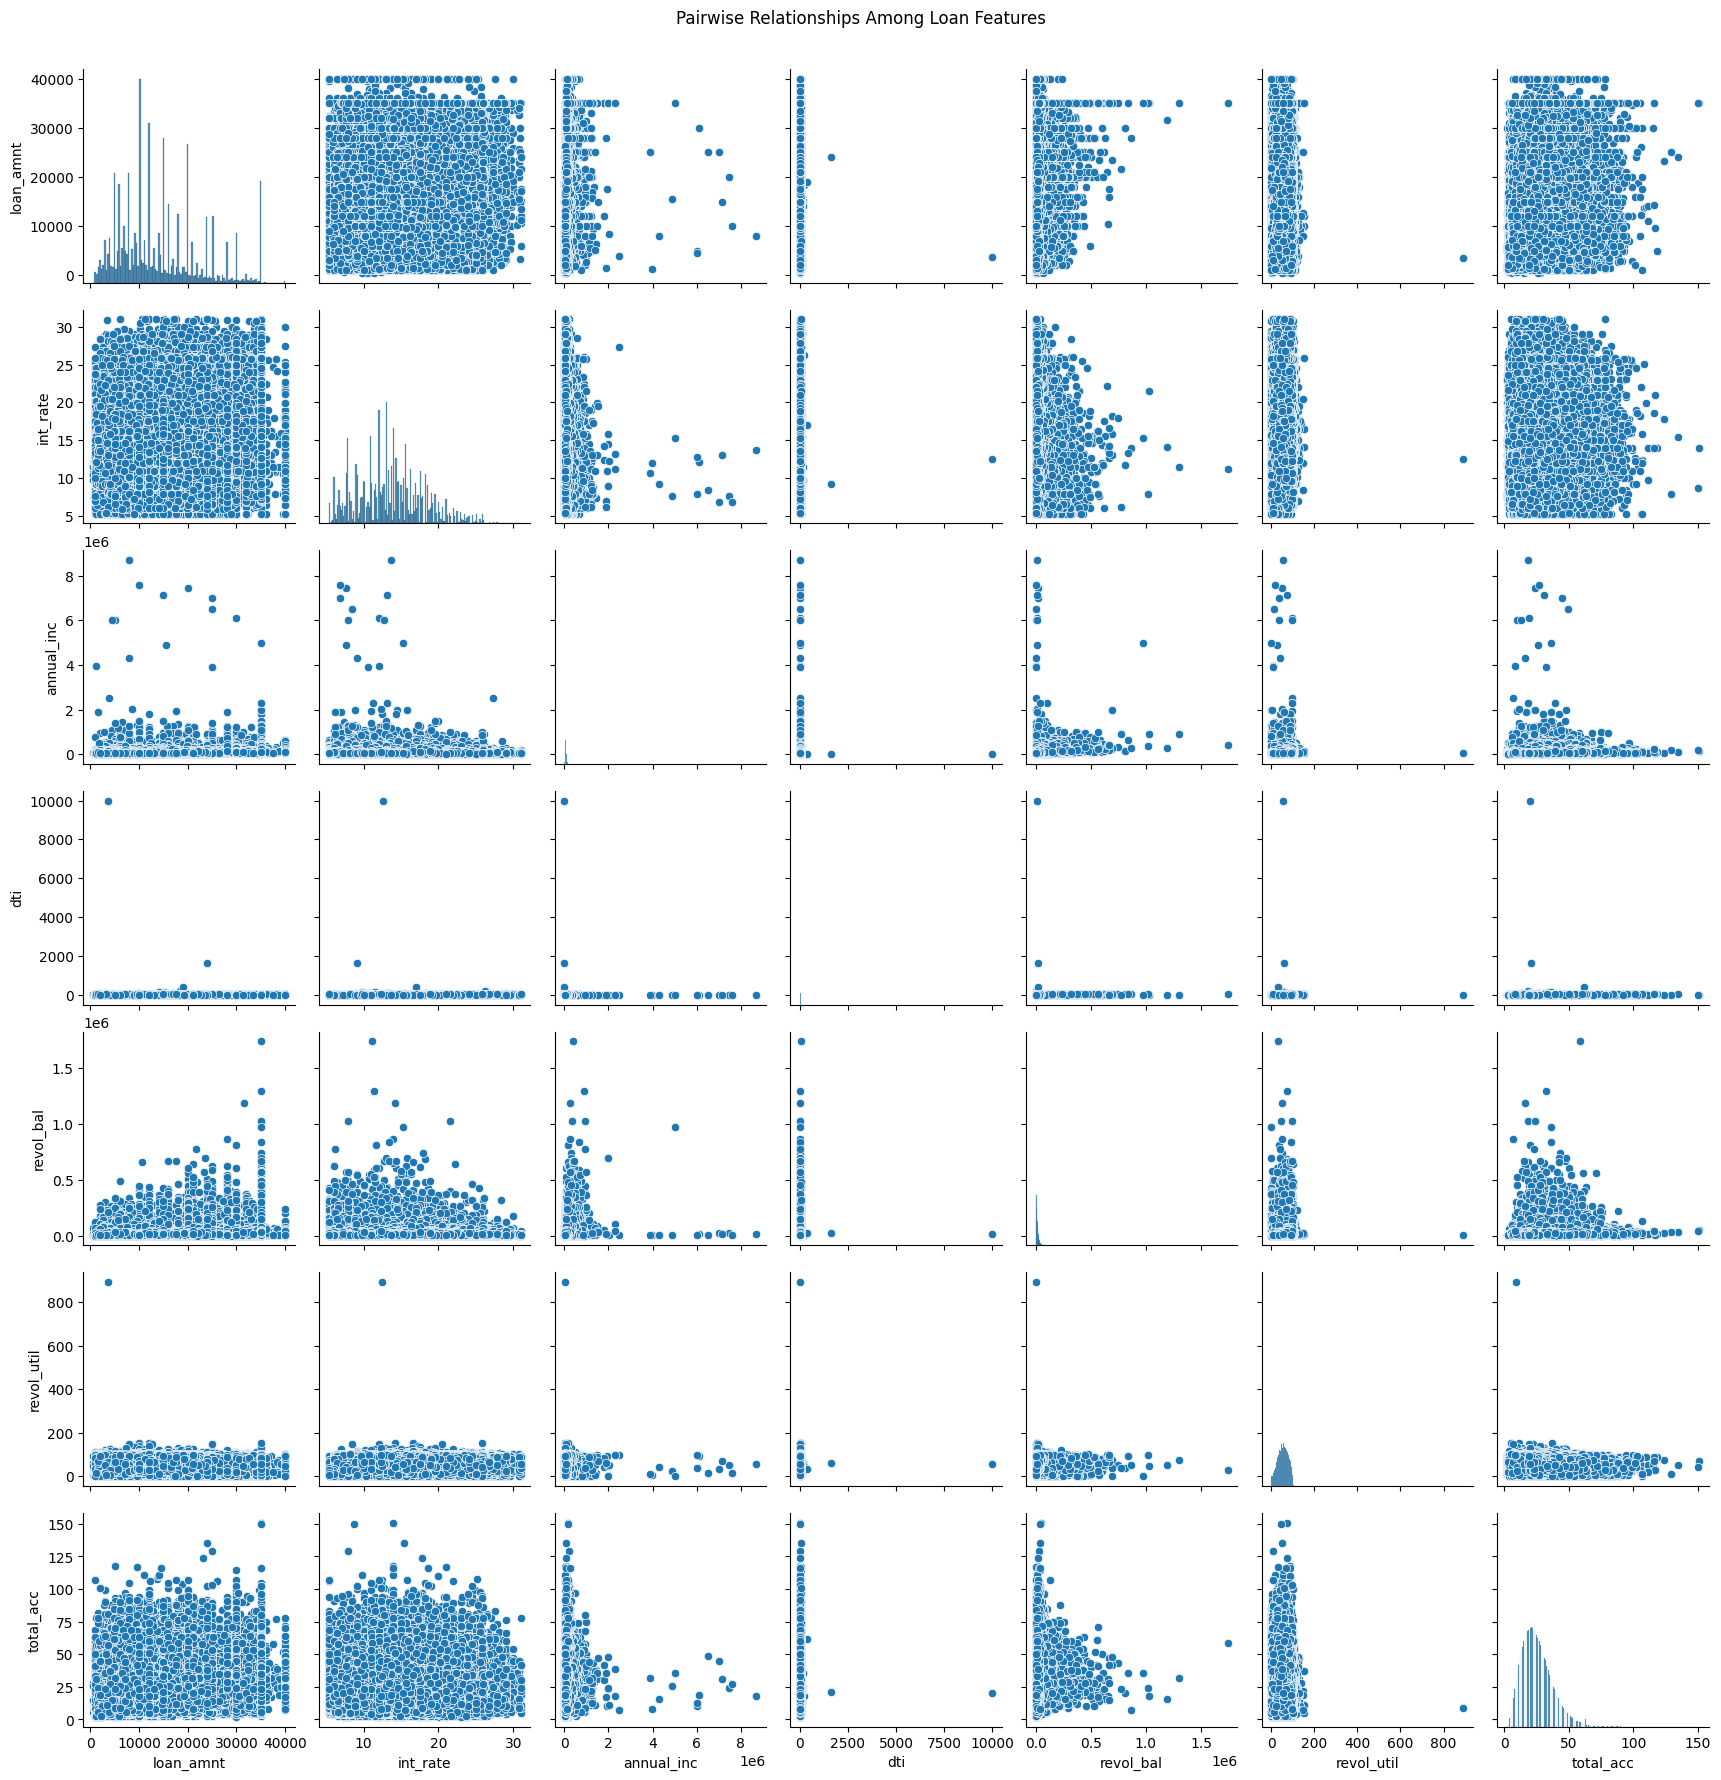

In [22]:
selected_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti','revol_bal','revol_util','total_acc']
sns.pairplot(df[selected_features], palette=[color1, color2])
plt.suptitle("Pairwise Relationships Among Loan Features", y=1.02)
plt.show()

- **Loan Amount & Installment:** 
   - Notice a clear linear pattern: higher `loan_amnt` generally leads to higher `installment`.
- **Annual Income vs. Other Features**  
  - Many points cluster near the lower end, with a few extremely high values (outliers).
  - No strong linear correlation with `loan_amnt` or `int_rate`.
- **Interest Rate (`int_rate`)**  
  - Appears scattered with most features, suggesting weak direct correlations.
- **Debt-to-Income Ratio (`dti`)**  
  - Skewed distribution, no strong linear relationship with `annual_inc` or `loan_amnt`.
- **Revolving Balance & Revolving Utilization**  
  - Some visible clustering; borrowers with higher `revol_bal` can also have higher `revol_util`, but the correlation may not be strictly linear.
- **Overall Observation**  
  - Most scatter plots show **weak linear correlations** except for `loan_amnt` vs. `installment`.
  - Several features are **heavily skewed** (outliers), indicating potential need for transformations.

**Implication:**
- The limited linear relationships suggest you may rely on **non-linear models** (like Random Forest or XGBoost).
- **Log transformations** or other scaling techniques could help address outliers and skewed distributions.


#### **Checking Class Distribution**

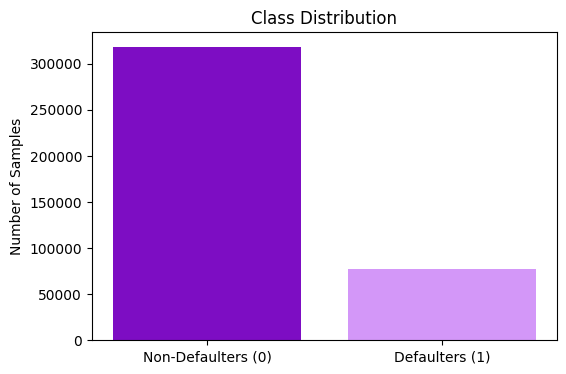

Non-Defaulters: 318357 (80.39%)
Defaulters: 77673 (19.61%)


In [23]:
# Check class distribution
class_counts = df['loan_status'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, color=[color1, color2])
# sns.barplot(x=list(class_counts.index), y=class_counts.values, color=color2)
plt.xticks([0,1], labels=['Non-Defaulters (0)', 'Defaulters (1)'])
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

print(f"Non-Defaulters: {class_counts[0]} ({class_counts[0] / len(df['loan_status']):.2%})")
print(f"Defaulters: {class_counts[1]} ({class_counts[1] / len(df['loan_status']):.2%})")


- **Class Imbalance:** 
The dataset has significantly more Non-Defaulters (0) than Defaulters (1).
- **Impact on Model Training:**
 A model trained on this data might favor Non-Defaulters, leading to poor performance on Defaulters.
- **Solution:**
 Consider balancing techniques like oversampling (SMOTE), undersampling, or class-weight adjustments to handle this imbalance.

#### **Heatmap for correlation matrix**

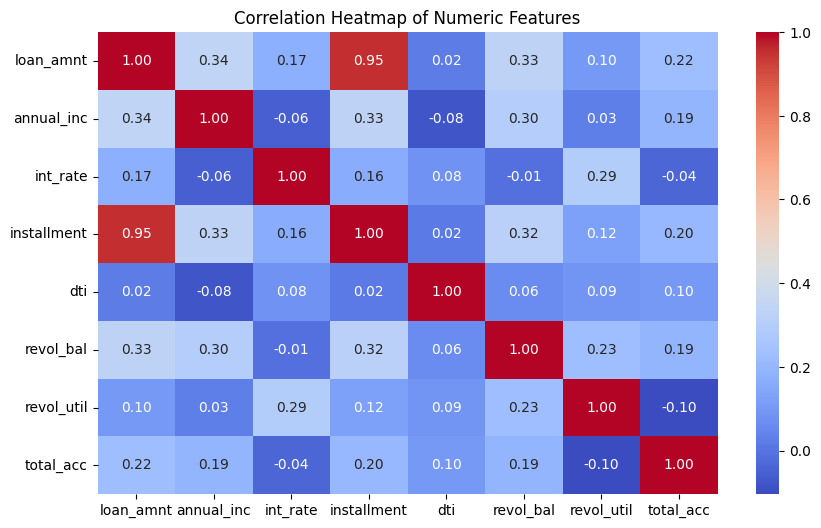

In [24]:
plt.figure(figsize=(10, 6))
numeric_features = ['loan_amnt', 'annual_inc', 'int_rate', 'installment','dti', 'revol_bal', 'revol_util', 'total_acc']
corr_matrix = df[numeric_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

- **Highly Correlated Features:** 
    - Loan Amount & Installment (0.95): Strong correlation suggests that installment size increases with loan amount, making one of them potentially redundant.
- **Low Correlation with Loan Status:**
    - Features like DTI (Debt-to-Income Ratio) and Annual Income have weak correlations, indicating they may not strongly impact loan default.
- **Feature Selection:**
     - Remove or combine highly correlated features to avoid multicollinearity, improving model efficiency.

## **Handling Misssing Data**

In [25]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**Observation:** Identifies columns with missing values and their counts.

**Implication:** Helps decide the best imputation strategy.


In [26]:
missing_percentage = df['emp_title'].isnull().sum() / len(df) * 100
print(f"Missing Percentage of emp_title: {missing_percentage:.2f}%")

Missing Percentage of emp_title: 5.79%


In [27]:
# Add 'Unknown' as a valid category
df['emp_title'] = df['emp_title'].cat.add_categories('Unknown')

In [28]:
# Filling missing values with unknown
df['emp_title'] = df['emp_title'].fillna('Unknown')


**Observation:**  
The "emp_title" column has 5.79% missing values.

**Implication:**  
By adding "Unknown" as a valid category and filling missing values with it, we maintain data integrity and preserve all records for further analysis.


In [29]:
missing_percentage = df['mort_acc'].isnull().sum() / len(df) * 100
print(f"Missing Percentage of mort_acc: {missing_percentage:.2f}%")

Missing Percentage of mort_acc: 9.54%


In [30]:
df[['mort_acc', 'total_acc']].corr()

,mort_acc,total_acc
mort_acc,1.000000,0.381072
total_acc,0.381072,1.000000


In [31]:
# People who have more total accounts usually have more mortgage accounts too!
# So, we can use total_acc to guess the missing values of mort_acc. 
mort_acc_mapping = df.groupby('total_acc')['mort_acc'].median()
df['mort_acc'] = df.apply(lambda x: mort_acc_mapping[x['total_acc']] if pd.isnull(x['mort_acc']) else x['mort_acc'], axis= 1)

**Observation:**  
- The "mort_acc" column has missing values.  
- Its missing percentage is computed, and the correlation between "mort_acc" and "total_acc" is ~0.38, indicating a moderate positive relationship.


In [32]:
# I am gonna Use median because percentage values are numeric and the median is robust to outliers.
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())  

In [33]:
# number for emp_length 
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
         '6 years', '7 years', '8 years', '9 years', '10+ years']

df['emp_length'] = pd.Categorical(df['emp_length'], categories=order, ordered=True).codes

In [34]:
# filling missing values of emp_length with median
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

**Observation:**  
- The "revol_util" column's missing values are filled with the median, ensuring that outliers do not disproportionately affect the imputation.  
- The "emp_length" column is converted into an ordered numeric format using a defined category order, and any missing values are imputed with the median of these numeric codes.


In [35]:
# filling missing values of pub_rec_bankruptcies with the most common value mode
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])
print(f"mode values in 'pub_rec_bankruptcies' is: {df['pub_rec_bankruptcies'].mode()[0]}")

mode values in 'pub_rec_bankruptcies' is: 0.0


In [36]:
# A final check is performed to confirm that all missing values have been handled.
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

##  **Outliers Handling**

In [37]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10,RENT,117000.0,...,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0


In [38]:
# we will use IQR for the following columns 'pub_rec', 'dti', 'open_acc' , 'revol_util' Cause its outliers doesn't make sence or they may errors 
df_original = df.copy()
def remove_outliers(df, columns):
    for col in columns:    
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before_count = df.shape[0] 
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after_count = df.shape[0] 
        print(f"Removed {before_count - after_count} outliers from '{col}'")
    return df 

In [39]:
outlier_con_columns = ['dti', 'open_acc' , 'revol_util', 'pub_rec']
df = remove_outliers(df, outlier_con_columns)

Removed 275 outliers from 'dti'
Removed 10280 outliers from 'open_acc'
Removed 12 outliers from 'revol_util'
Removed 56451 outliers from 'pub_rec'


In [40]:
# we will use 'winsorization' method for those outliers that are not necesserly errors but it's a valueble information.
def winsorization(series , lower_percentile=1 , upper_percentile=99): 
    lower_bond = np.percentile(series , lower_percentile)
    upper_bond = np.percentile(series , upper_percentile)
    return np.clip(series , lower_bond , upper_bond) 

df['loan_amnt'] = winsorization(df['loan_amnt'])
df['int_rate'] = winsorization(df['int_rate'])
df['installment'] = winsorization(df['installment'])
df['total_acc'] = winsorization(df['total_acc'])
df['pub_rec_bankruptcies'] = winsorization(df['pub_rec_bankruptcies'])

##### **Log Transformation for skewed data**

In [41]:
log_transform_cols = ['annual_inc', 'dti', 'revol_bal','mort_acc']
for col in log_transform_cols:
    df[col] = np.log1p(df[col])

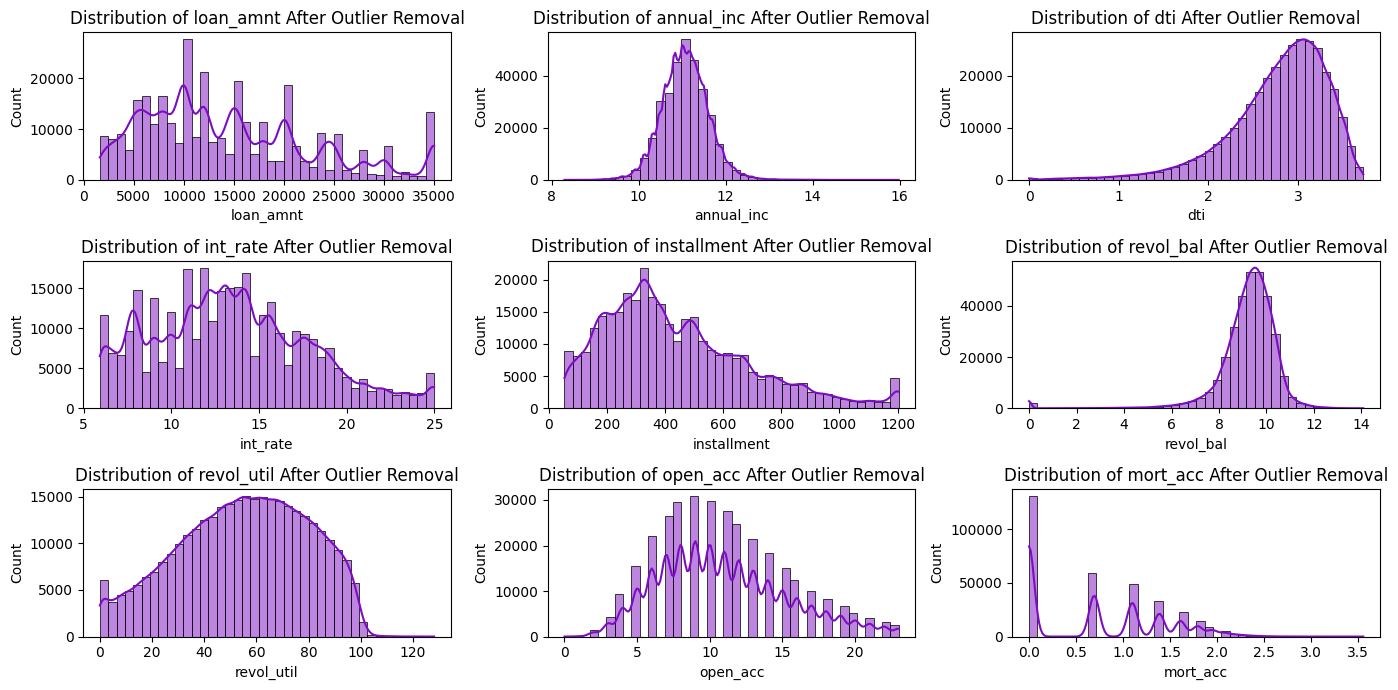

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(14, 7) )
selected_cols = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'installment', 'revol_bal', 'revol_util', 'open_acc', 'mort_acc'] 
axes = axes.flatten()

for i, col in enumerate(selected_cols):
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i] , color=color1)
    axes[i].set_title(f'Distribution of {col} After Outlier Removal')

plt.tight_layout()
plt.show()

 - **Observation:**  
   - Applied log transformation to `annual_inc`, `dti`, `revol_bal`, and `mort_acc` to reduce skewness.  
   - Visualized distributions of key numerical features after outlier removal using histograms with KDE plots.  

- **Implication:**  
  - Log transformation helps normalize skewed data, improving model performance.  
  - Visual analysis ensures that transformed data is well-distributed and ready for modeling.


##  **Feature Engineering**

In [43]:
# Creating a Working Copy
df_cleaned = df.copy()

- **Implication:** This preserves the raw data and allows safe experimentation with feature engineering.

In [44]:
# Displays the first 3 rows of the working copy to Verify the structure and content of the data before transformations
df_cleaned.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10,RENT,11.669938,...,3.304686,16.0,0.0,10.501500,41.8,25.0,w,INDIVIDUAL,0.000000,0.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,11.082158,...,3.137666,17.0,0.0,9.910066,53.3,27.0,f,INDIVIDUAL,1.386294,0.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0,RENT,10.670303,...,2.623944,13.0,0.0,9.391661,92.2,26.0,f,INDIVIDUAL,0.000000,0.0


In [45]:
# Creating A helper function to remove specified columns.
def drop_column(df, columns):
    df.drop(columns=columns, inplace=True)

In [46]:
# Maps loan status to numeric values (0: Fully Paid, 1: Charged Off).
df_cleaned['loan_status_decode'] = df_cleaned['loan_status']
df_cleaned['loan_status_decode'] = df_cleaned['loan_status_decode'].map({'Fully Paid' : 0 , 'Charged Off' : 1 }).astype(int)
drop_column(df_cleaned, ['loan_status'])


In [47]:
# Calculates the mean default rate per home ownership category and maps it back to the original dataset , the original column is dropped for clarity.
loan_repayment_rate = df_cleaned.groupby(['home_ownership'])['loan_status_decode'].mean()
df_cleaned['home_ownership_repayment_rate'] = df_cleaned['home_ownership'].map(loan_repayment_rate).astype(float)
drop_column(df_cleaned, ['home_ownership'])

In [48]:
# Displays the distribution of the new home ownership repayment rate feature.
df_cleaned['home_ownership_repayment_rate'].value_counts()

home_ownership_repayment_rate
0.166161    164172
0.221724    133639
0.202325     31059
0.146789       109
0.233333        30
0.000000         3
Name: count, dtype: int64

In [49]:
# numbers for each grade so model can understand , removes the original grade column to reduce redundancy.
grade_order = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
df_cleaned['grade_encoded'] = df_cleaned['grade'].map(grade_order)
df_cleaned['grade_encoded'] = df_cleaned['grade_encoded'].astype(int)
drop_column(df_cleaned, ['grade'])

In [50]:
# Sub-grade is encoded as ordered numeric values based on a defined hierarchy
sub_grade_order = [f"{g}{n}" for g in "ABCDEFG" for n in range(1, 6)] 
df_cleaned['sub_grade_encoded'] = pd.Categorical(df_cleaned['sub_grade'], categories=sub_grade_order, ordered=True).codes
drop_column(df_cleaned, ['sub_grade'])

In [51]:
# Converts initial list status to numeric (binary) values.
df_cleaned['initial_list_status'] = df_cleaned['initial_list_status'].map({'f' : 0 , 'w' : 1 }).astype(int)

In [52]:
# Maps application type to numeric codes.
df_cleaned['application_type'] = df_cleaned['application_type'].map({'INDIVIDUAL': 0, 'JOINT': 1, 'DIRECT_PAY': 2}).astype(int)

In [53]:
# A new feature is created by dividing loan amount by annual income. it Provides a measure of borrower affordability and risk
df_cleaned['loan_to_income_ratio'] = df_cleaned['loan_amnt'] / df_cleaned['annual_inc']

In [54]:
# Adjusts the DTI by annual income, accounting for extreme values.
df_cleaned['dti_adjusted'] = df_cleaned['dti'] / (df_cleaned['annual_inc'] + 1)  # Avoid division by zero

In [55]:
# Calculates credit utilization as the ratio of revolving balance to total accounts, Captures borrower credit usage behavior, an important risk factor.
df_cleaned['credit_utilization'] = df_cleaned['revol_bal'] / (df_cleaned['total_acc'] + 1)

In [56]:
# Create Loan Installment Ratio, Forms a ratio between the loan amount and monthly installment , Indicates repayment burden and affordability.
df_cleaned['loan_installment_ratio'] = df_cleaned['loan_amnt'] / (df_cleaned['installment'] + 1)


In [57]:
# Create Mortgage vs. Loan Ratio , Computes the ratio of mortgage accounts to loan amount, Helps assess financial stability and risk through property-related metrics.
df_cleaned['mortgage_vs_loan'] = df_cleaned['mort_acc'] / (df_cleaned['loan_amnt'] + 1)


In [58]:
# Create Employment Income Ratio , Calculates the ratio of employment length to annual income.
df_cleaned['employment_income_ratio'] = df_cleaned['emp_length'] / (df_cleaned['annual_inc'] + 1)

In [59]:
# Convert Loan Term to Numeric (Months)
df_cleaned['term_in_months'] = df_cleaned['term'].str.extract('(\\d+)').astype(int)
df_cleaned.drop(columns=['term'], inplace=True)

In [60]:
# Create Loan Risk Score , Combines encoded grade and sub-grade into a composite risk score.
df_cleaned['loan_risk_score'] = df_cleaned['grade_encoded'] * 10 + df_cleaned['sub_grade_encoded'] # it merges two encoded risk factors into one weighted score

In [61]:
# One-Hot Encode Verification Status , Converts the verification status categorical feature into dummy variables.
df_cleaned = pd.get_dummies(df_cleaned, columns=['verification_status'], drop_first=True)


In [62]:
 # Lists the current column names to confirm the changes
df_cleaned.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length',
       'annual_inc', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_status_decode',
       'home_ownership_repayment_rate', 'grade_encoded', 'sub_grade_encoded',
       'loan_to_income_ratio', 'dti_adjusted', 'credit_utilization',
       'loan_installment_ratio', 'mortgage_vs_loan', 'employment_income_ratio',
       'term_in_months', 'loan_risk_score',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

In [63]:
#Boolean columns are converted to integers, so model will understand it better like false to 0 and true to 1
for col in df_cleaned.select_dtypes(include=['bool']).columns:
    df_cleaned[col] = df_cleaned[col].astype(int)

In [64]:
# Encode Loan Purpose with Target Mean , Applies target mean encoding to the "purpose" feature, then removes the original column.
target_mean = df_cleaned.groupby('purpose')['loan_status_decode'].mean()
df_cleaned['purpose_encoded'] = df_cleaned['purpose'].map(target_mean).astype(int)
drop_column(df_cleaned, ['purpose'])

In [65]:
df_cleaned = df_cleaned.drop(columns=['emp_title']) # The "emp_title" column is dropped. Removes a high cardinality feature that is less informative

**Create Final Transformed DataFrame**

In [66]:
df_transformed = df_cleaned.copy() # this serves as the transformed dataset

In [67]:
df_transformed.columns # Verifying that all intended transformations and feature engineering steps were applied.

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status_decode',
       'home_ownership_repayment_rate', 'grade_encoded', 'sub_grade_encoded',
       'loan_to_income_ratio', 'dti_adjusted', 'credit_utilization',
       'loan_installment_ratio', 'mortgage_vs_loan', 'employment_income_ratio',
       'term_in_months', 'loan_risk_score',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_encoded'],
      dtype='object')

In [68]:
df_transformed.dtypes # Check Data Types of transformed dataset

loan_amnt                              float64
int_rate                               float64
installment                            float64
emp_length                                int8
annual_inc                             float64
dti                                    float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
initial_list_status                      int32
application_type                         int32
mort_acc                               float64
pub_rec_bankruptcies                   float64
loan_status_decode                       int32
home_ownership_repayment_rate          float64
grade_encoded                            int32
sub_grade_encoded                         int8
loan_to_income_ratio                   float64
dti_adjusted                           float64
credit_utiliz

In [69]:
df_transformed.isnull().sum() # Check for missing values

loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
application_type                       0
mort_acc                               0
pub_rec_bankruptcies                   0
loan_status_decode                     0
home_ownership_repayment_rate          0
grade_encoded                          0
sub_grade_encoded                      0
loan_to_income_ratio                   0
dti_adjusted                           0
credit_utilization                     0
loan_installment_ratio                 0
mortgage_vs_loan                       0
employment_incom

In [70]:
df_transformed.head(3)

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,dti_adjusted,credit_utilization,loan_installment_ratio,mortgage_vs_loan,employment_income_ratio,term_in_months,loan_risk_score,verification_status_Source Verified,verification_status_Verified,purpose_encoded
0,10000.0,11.44,329.48,10,11.669938,3.304686,16.0,0.0,10.501500,41.8,...,0.260829,0.403904,30.259017,0.000000,0.789270,36,68,0,0,0
1,8000.0,11.99,265.68,4,11.082158,3.137666,17.0,0.0,9.910066,53.3,...,0.259694,0.353931,29.998500,0.000173,0.331067,36,69,0,0,0
2,15600.0,10.49,506.97,0,10.670303,2.623944,13.0,0.0,9.391661,92.2,...,0.224839,0.347839,30.710475,0.000000,0.000000,36,67,1,0,0


## **Multicollinearity Check & Feature Selection**

In [71]:
def calculate_vif(df):
    vif_data = pd.DataFrame() # creating a dataframe to store VIF values and feature names
    vif_data['Feature_name'] = df_transformed.columns
    vif_data['VIF Values'] = [variance_inflation_factor(df_transformed.values,col_index) for col_index in range(df_transformed.shape[1])] # the shape[] give us number of column in a dataset
    return vif_data

vif_result = calculate_vif(df_transformed) 
print(vif_result) 

                           Feature_name   VIF Values
0                             loan_amnt  1825.420433
1                              int_rate   226.395063
2                           installment   256.642623
3                            emp_length  1685.913295
4                            annual_inc  1042.821742
5                                   dti  3005.931266
6                              open_acc    15.569855
7                               pub_rec          NaN
8                             revol_bal   119.670710
9                            revol_util    10.401069
10                            total_acc    25.255983
11                  initial_list_status     1.732572
12                     application_type     1.003017
13                             mort_acc     6.344572
14                 pub_rec_bankruptcies          NaN
15                   loan_status_decode     1.360323
16        home_ownership_repayment_rate    85.245744
17                        grade_encoded       

**Observation:**  
- This step calculates the VIF for each feature in `df_transformed`, which measures multicollinearity.  

**Implication:**  
- High VIF values indicate features that are highly correlated, suggesting potential redundancy.  
- Such features may need to be removed or combined to improve model stability.  

In [72]:
# Dropping these features reduces multicollinearity and simplifies the dataset by eliminating variables that may not contribute significantly to the predictive model.
df_transformed.drop(columns=['pub_rec_bankruptcies','pub_rec', 'purpose_encoded','sub_grade_encoded', 'loan_risk_score'], inplace=True)

## **Train-Test Split & Handling Imbalanced Data**

In [73]:
# X: features without target
X = df_transformed.drop(columns=['loan_status_decode'])

# y: target to predict
y = df_transformed['loan_status_decode']

In [74]:
# SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class Distribution After SMOTE:")

# Convert resampled data back to DataFrames with column names
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.DataFrame(y_resampled, columns=['loan_status_decode'])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

# Show class distribution before and after
print("Before Resampling:")
print(y.value_counts())

print("\nAfter Resampling:")
print(y_resampled['loan_status_decode'].value_counts())

Class Distribution After SMOTE:
Before Resampling:
loan_status_decode
0    265795
1     63217
Name: count, dtype: int64

After Resampling:
loan_status_decode
0    265795
1    265795
Name: count, dtype: int64


**Observation:**  
- The features (`X`) and target (`y`) are separated from the transformed dataset.  
- SMOTE is applied to oversample the minority class, resulting in a balanced class distribution.  
- The code prints class distributions before and after SMOTE, confirming the balancing effect.  
- The resampled data is then split into training (70%) and testing (30%) sets.

**Implication:**  
- Balancing the dataset with SMOTE helps mitigate class imbalance, reducing bias towards the majority class during model training.  
- A balanced dataset leads to more robust and fair evaluation of model performance.  
- Splitting the data into training and testing sets ensures that the model’s performance is validated on unseen data.


**Exploratory Model Evaluation**

In [75]:
df_transformed = pd.concat([X_train, y_train], axis=1)  # Combine X_train and y_train side by side
correlation = df_transformed.corr()['loan_status_decode'].abs().sort_values(ascending=False)  # Get absolute correlation with target, sorted high to low
print(correlation)  # Display the correlation values

loan_status_decode                     1.000000
grade_encoded                          0.376974
int_rate                               0.318877
term_in_months                         0.204769
dti_adjusted                           0.175371
initial_list_status                    0.174930
dti                                    0.160538
verification_status_Source Verified    0.139223
revol_util                             0.121487
annual_inc                             0.115628
verification_status_Verified           0.112921
mortgage_vs_loan                       0.106162
mort_acc                               0.097093
home_ownership_repayment_rate          0.088936
loan_to_income_ratio                   0.082827
loan_installment_ratio                 0.073724
loan_amnt                              0.070410
emp_length                             0.069146
installment                            0.047388
total_acc                              0.042726
credit_utilization                     0

**Observation:**  
- `grade_encoded` (0.38) and `int_rate` (0.32) have the highest correlations with `loan_status_decode`.  
- Most other features have weak correlations (<0.2).  

**Implication:**  
- No single feature strongly predicts default; multiple features contribute.  
- Non-linear models or additional feature engineering may improve predictions.  


## **Custom Evaluation Functions**

In [76]:
# Define function to evaluate model performance
def metrics_score(actual_label, predicted_label):
    print(classification_report(actual_label, predicted_label))  # Print precision, recall, F1-score, etc.
    cm = confusion_matrix(actual_label, predicted_label)  # Generate confusion matrix

    # Plot heatmap with correct label order
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='.2f' , cbar= False ,
                xticklabels=['Non-Default', 'Default'],  # Predicted: 0, 1
                yticklabels=['Non-Default', 'Default'])  # Actual: 0, 1
    plt.xlabel('Predicted')  # X-axis = Predicted
    plt.ylabel('Actual')  # Y-axis = Actual
    plt.show()

In [77]:
# Define function to plot feature importance
def feature_importance(model, features, model_name):
    # Check if model is Logistic Regression or tree/ensemble
    if model_name == 'Logistic Regression' or hasattr(model, 'coef_'):  # For Logistic Regression
        importances = np.abs(model.coef_[0])  # Use absolute coefficients
    elif hasattr(model, 'feature_importances_'):  # For tree/ensemble models
        importances = model.feature_importances_  # Use feature importances
    else:
        raise ValueError("Model type not supported for feature importance")
    
    feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})  # Create DataFrame with feature names and importance scores
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    # Plot bar chart of feature importances
    plt.figure(figsize=(15,8))
    sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for {model_name}')
    plt.show()

## **Model Training & Hyperparameter Tuning** 

### Random Forest Model Setup
I used a Random Forest model because it is good at capturing complex patterns in data. Here are the main settings I used:
- **n_estimators=500:** This means the model uses 500 trees.
- **min_samples_leaf=3:** Each leaf must have at least 3 samples.
- **max_features='sqrt':** Only the square root of the total features is used when looking for the best split.
- **max_depth=7:** The trees are limited to a depth of 7 to prevent overfitting.
- **criterion='entropy':** The model uses entropy to decide on splits.
- **random_state=1:** This ensures the results are reproducible.

**What I Expect:**  
The model should learn complex, non-linear relationships and give a good baseline performance.

Random Forest
Score for training data:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    185998
           1       0.76      0.78      0.77    186115

    accuracy                           0.77    372113
   macro avg       0.77      0.77      0.77    372113
weighted avg       0.77      0.77      0.77    372113



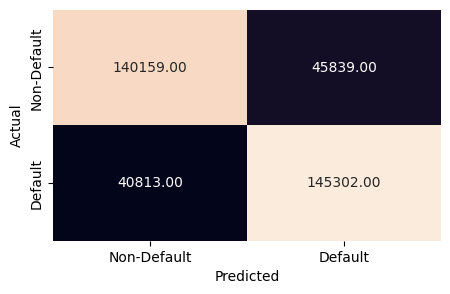

Score for test data:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     79797
           1       0.76      0.78      0.77     79680

    accuracy                           0.76    159477
   macro avg       0.76      0.76      0.76    159477
weighted avg       0.76      0.76      0.76    159477



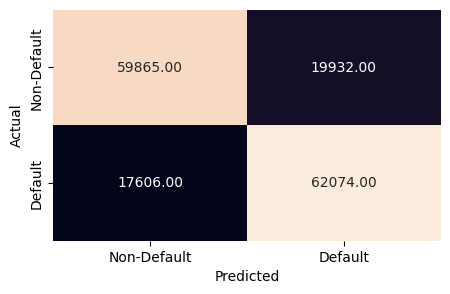

In [ ]:
# Make a Random Forest model
rf = RandomForestClassifier(random_state=1,n_estimators = 500, min_samples_leaf = 3, max_features= 'sqrt', max_depth= 7, criterion= 'entropy')

# Teach the model with training data
rf.fit(X_train, y_train)  # X_train is features, y_train is answers

# Predict
y_pred_train = rf.predict(X_train) # for training data
y_pred_test = rf.predict(X_test)   # for testing data

# Evaluate
print("Random Forest")
print("Score for training data:")
metrics_score(y_train, y_pred_train) # Check prediction on training OR seen data
print("Score for test data:")
metrics_score(y_test, y_pred_test) # Check prediction on testing OR unseen data

### Random Forest Model Evaluation

**Results:**  
The model was evaluated on both training and test sets, showing similar performance. The accuracy is around 77% on both, and the precision/recall values are balanced for both classes.

**Observation:**  
- The Random Forest model achieves about 76% accuracy on both training and testing data.
- Precision and recall are similar for default and non-default classes.

**Implication:**  
- The similar performance on both sets suggests that the model generalizes well and is not overfitting.
- The balanced metrics indicate that the model is effective at predicting both classes.

### Feature Importance For Random Forest

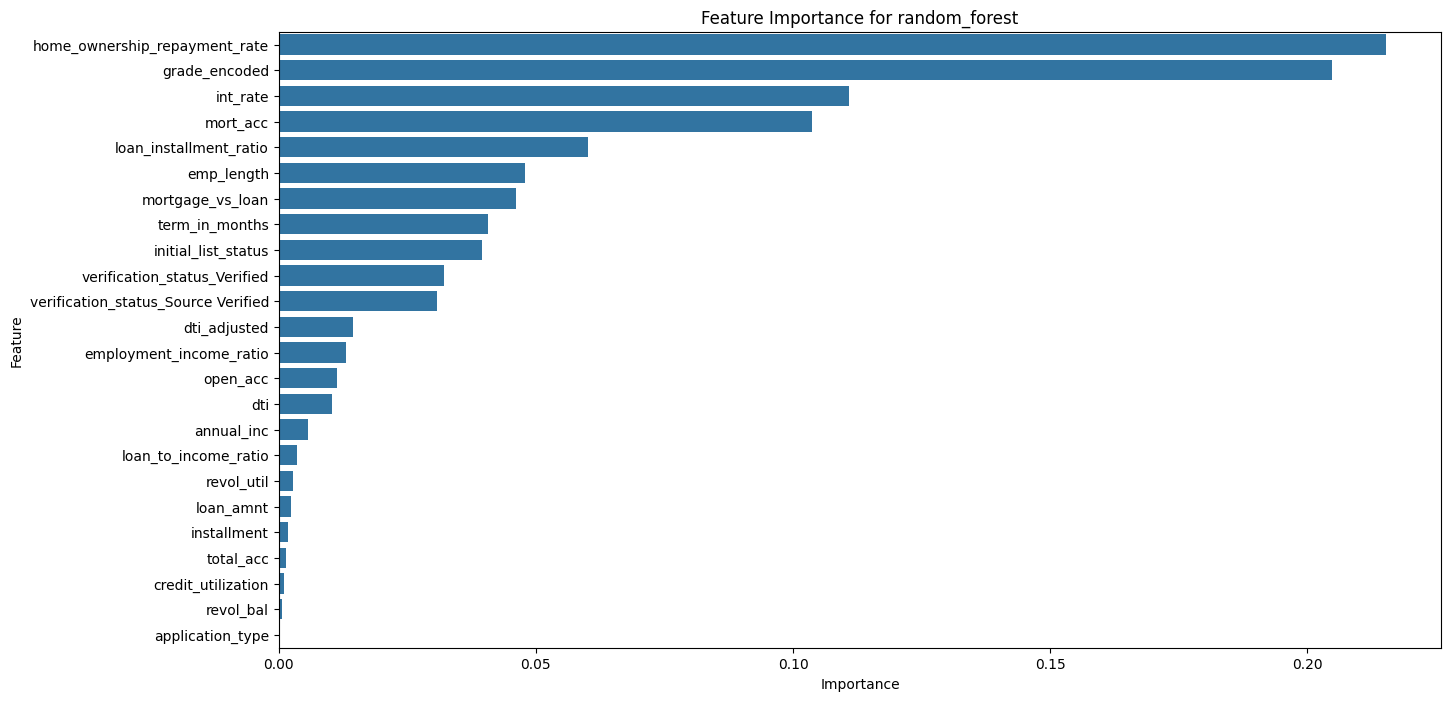

In [ ]:
feature_importance(rf, X_train, 'random_forest')

**Observation**  
- These top features heavily influence the model’s decisions.  
- **home_ownership_repayment_rate** and **grade_encoded** indicate that creditworthiness factors play a major role.

**Implication**  
- Business-wise, focusing on **interest rates** and **loan grades** could significantly impact lending decisions.  
- The model's emphasis on these features highlights their critical role in distinguishing between default and non-default loans. 

### Logistic Regression Model Setup
I chose to use a Logistic Regression model because it is simple and easy to understand. This model helps us see if a basic, linear approach can predict loan defaults.

**Parameters Used:**
- **class_weight:** 'balanced' (this helps when the classes are not equal)
- **solver:** 'liblinear' (good for small data and regularization)
- **penalty:** 'l2'
- **C:** 1 (controls the strength of regularization)
- **max_iter:** 1000 (ensures the model converges)
- **random_state:** 1 (for consistent results)

**What I Expect:**  
A stable model that clearly shows which features are important.

---

[LibLinear]Logistic Regression
Score for training data:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73    185998
           1       0.73      0.72      0.72    186115

    accuracy                           0.73    372113
   macro avg       0.73      0.73      0.73    372113
weighted avg       0.73      0.73      0.73    372113



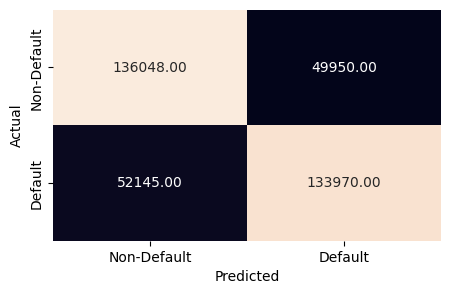

Score for test data:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     79797
           1       0.73      0.72      0.72     79680

    accuracy                           0.73    159477
   macro avg       0.73      0.73      0.73    159477
weighted avg       0.73      0.73      0.73    159477



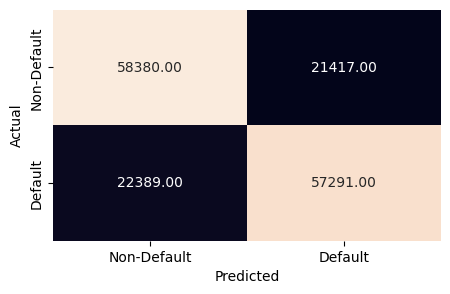

In [ ]:
# Make a Logistic Regression model
lg = LogisticRegression(random_state=1, class_weight = 'balanced', solver='liblinear', C=1, max_iter=1000, n_jobs=-1, verbose=1, penalty='l2')

lg.fit(X_train, y_train)

y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)

# Evaluate
print("Logistic Regression")
print("Score for training data:")
metrics_score(y_train, y_pred_train)
print("Score for test data:")
metrics_score(y_test, y_pred_test)

### Logistic Regression Model Evaluation

**Result:**
Logistic Regression achieved **73% accuracy** on both the training and test sets, with a balanced **precision, recall, and F1-score** across both classes. This suggests the model generalizes well but may not capture complex interactions in the data.

**Observation:**  
- The model gets about 73% accuracy on both training and test sets.
- Precision and recall are balanced for both classes.

**Implication:**  
- This suggests that the model works steadily without overfitting.
- Even though it is a simple, linear model, it is good at capturing important trends.

### Feature Importance For Logistic Regression

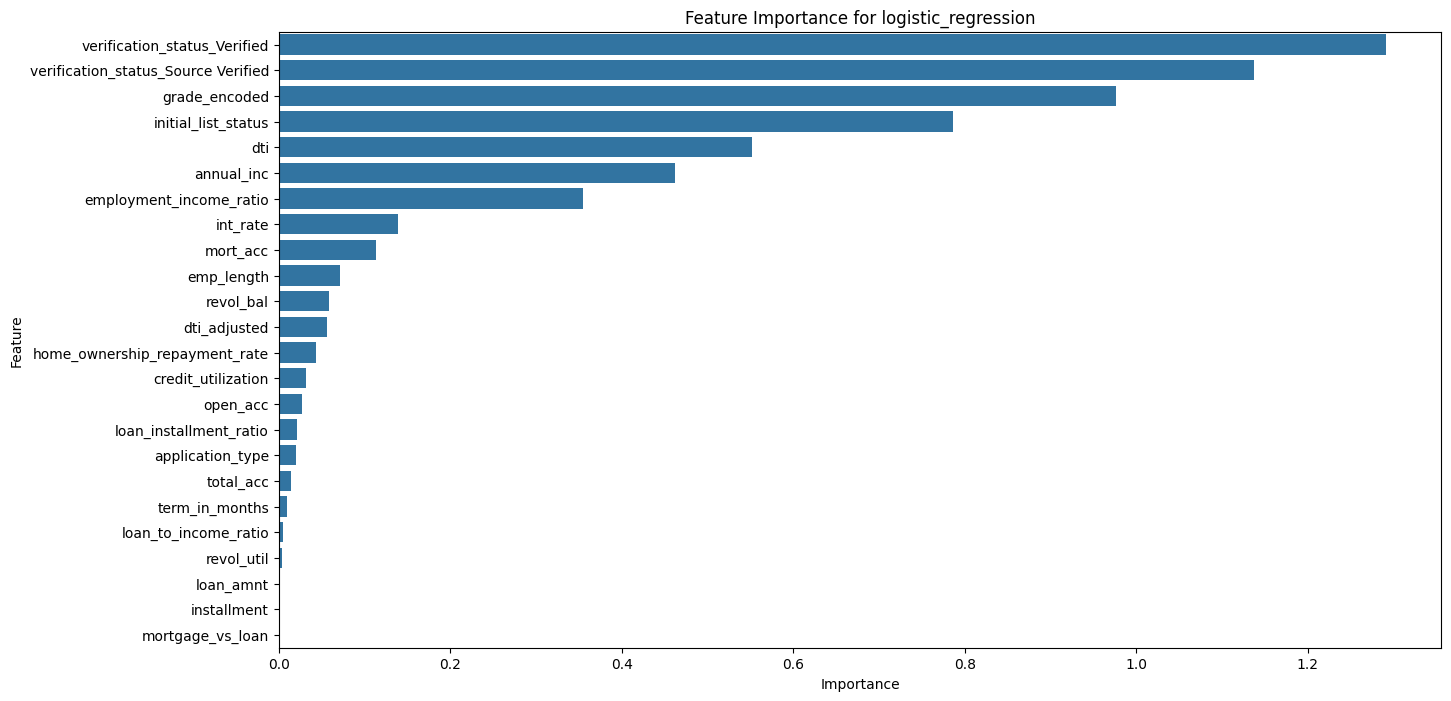

In [ ]:
# feature_importance(lg, X_train, 'logistic_regression') # Below is the feature importance plot for Logistic Regression

**Observation:**  
- Key features like verification status and loan grade have high importance.

**Implication:**  
- These features are crucial in predicting defaults, which is in line with our expectations.

#### 

### XGBoost Model Setup

Since the previous models (Random Forest and Logistic Regression) did not capture the complex, non-linear relationships in the data as well as we expected, I decided to try XGBoost. XGBoost is known for its ability to handle structured data effectively and often yields better performance for such problems.

**Initial Parameters:**
- **n_estimators:** 500 (number of trees)
- **min_child_weight:** 3
- **max_depth:** 7 (limits tree depth to avoid overfitting)
- **subsample:** 0.8 (fraction of samples used for each tree)
- **colsample_bytree:** 0.8 (fraction of features used for each tree)
- **learning_rate:** 0.1 (controls how quickly the model adapts)
- **random_state:** 1 (for reproducibility)

XGBoost
Score for training data:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    185998
           1       0.98      0.81      0.89    186115

    accuracy                           0.90    372113
   macro avg       0.91      0.90      0.90    372113
weighted avg       0.91      0.90      0.90    372113



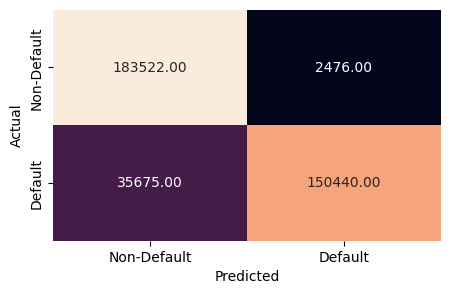

Score for test data:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     79797
           1       0.96      0.79      0.87     79680

    accuracy                           0.88    159477
   macro avg       0.89      0.88      0.88    159477
weighted avg       0.89      0.88      0.88    159477



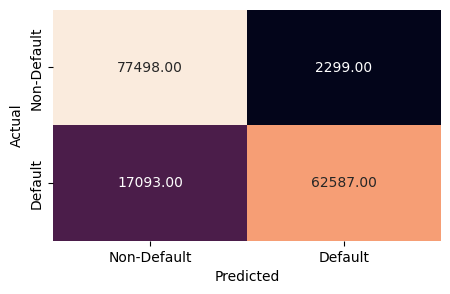

In [ ]:
xgb = XGBClassifier(random_state=1, n_estimators = 500, min_child_weight = 3, max_depth= 7, subsample= 0.8, colsample_bytree= 0.8, learning_rate= 0.1)

xgb.fit(X_train, y_train)

# Predict
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluate
print("XGBoost")
print("Score for training data:")
metrics_score(y_train, y_pred_train)
print("Score for test data:")
metrics_score(y_test, y_pred_test)

## XGBoost Model Evaluation

**Observation:**  
- The first XGBoost model got about **88% accuracy** on the test data. This result is better than the previous models.  
- The recall for the default class is also much better, which shows that XGBoost is catching the complicated patterns in the data more effectively.

**Result:**  
- **Test Accuracy:** 88%  
- **Default Class Recall:** Higher than in Random Forest and Logistic Regression

**Implication:**  
- XGBoost performs better than the earlier models in both accuracy and in catching defaults.  
- Because these results are promising, we will now use hyperparameter tuning to try to make the model even better.


### Hyperparameter Tuning for XGBoost

**Objective:**
To identify the optimal set of hyperparameters that maximize the model's performance, specifically focusing on accuracy and recall for the default class.

**Hyperparameters to Tune:**
- **n_estimators:** Number of boosting rounds. Values: [100, 300, 500]
- **min_child_weight:** Minimum sum of instance weight (hessian) needed in a child. Values: [1, 3, 5, 10]
- **colsample_bytree:** Fraction of features used for fitting individual base learners. Values: [0.6, 0.8, 0.9, 1.0]
- **learning_rate:** Step size shrinkage used to prevent overfitting. Values: [0.1, 0.097, 0.085]

**Method:**
We will utilize RandomizedSearchCV for hyperparameter tuning due to its efficiency and speed in exploring a wide range of hyperparameter values.

**Expected Outcome:**
The best combination of hyperparameters that enhances the model's predictive performance, particularly in identifying default cases.


In [ ]:
xgb = XGBClassifier(random_state=1,  
    eval_metric='logloss',  
    nthread=-1)  

param_grid = {
    "n_estimators": [100, 300, 500],       
    "min_child_weight": [1, 3, 5, 10],          
    "subsample": [0.6, 0.8,0.8, 1.0] , 
    "colsample_bytree": [0.6, 0.8, 0.9, 1.0] ,
    "learning_rate": [0.1, 0.097, 0.085]
}

# Faster RandomizedSearchCV
search = RandomizedSearchCV(
   xgb,
    param_distributions=param_grid,
    n_iter=20,          # Reduced from 20 for speed
    cv=5,              # Reduced from 5
    scoring='recall',  # Changed to 'recall' for minority class 
    n_jobs=1,          # Avoid multiprocessing issue
    random_state=42,
    error_score='raise'
)
search.fit(X_train, y_train)

print("Best Settings:", search.best_params_)
print("Best Score:", search.best_score_)

Best Settings: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 3, 'learning_rate': 0.097, 'colsample_bytree': 0.9}
Best Score: 0.7843215216398463


### Applying Best Parameters from RandomizedSearchCV to XGBoost
In this step, I will use the best parameters found by RandomizedSearchCV to train the XGBoost model. This way, I aim to make the model work better by using the most effective settings.

XGBoost
Score for training data:
              precision    recall  f1-score   support

           0       0.84      0.99      0.90    185998
           1       0.98      0.81      0.89    186115

    accuracy                           0.90    372113
   macro avg       0.91      0.90      0.90    372113
weighted avg       0.91      0.90      0.90    372113



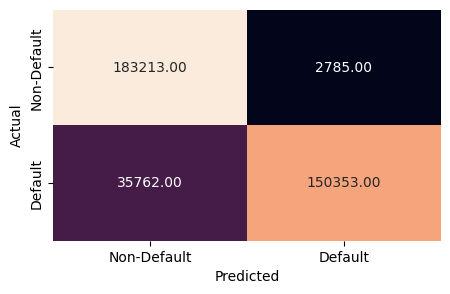

Score for test or unseen data:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     79797
           1       0.96      0.79      0.86     79680

    accuracy                           0.88    159477
   macro avg       0.89      0.88      0.88    159477
weighted avg       0.89      0.88      0.88    159477



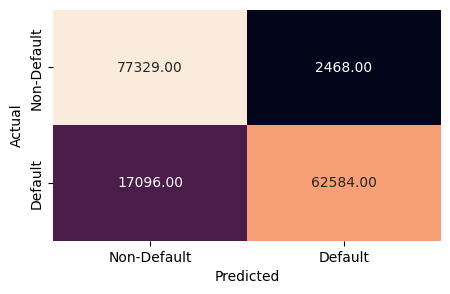

In [78]:
xgb = XGBClassifier(random_state=1, n_estimators = 500, min_child_weight = 3, max_depth= 7, subsample= 0.6,  learning_rate= 0.097, colsample_bytree= 0.9)
xgb.fit(X_train, y_train)
# Predict
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluate
print("XGBoost")
print("Score for training data:")
metrics_score(y_train, y_pred_train)
print("Score for test or unseen data:")
metrics_score(y_test, y_pred_test)

##### **Observation:**
After extensive experimentation with various models and hyperparameter tuning, the XGBoost model provided the best performance with an accuracy of 88% on the test data. Despite hyperparameter tuning, the results did not significantly improve, indicating that the current model configuration is likely optimal for this dataset.

#### **Implication:**
Overall, the current XGBoost model provides a robust baseline for predicting loan defaults.

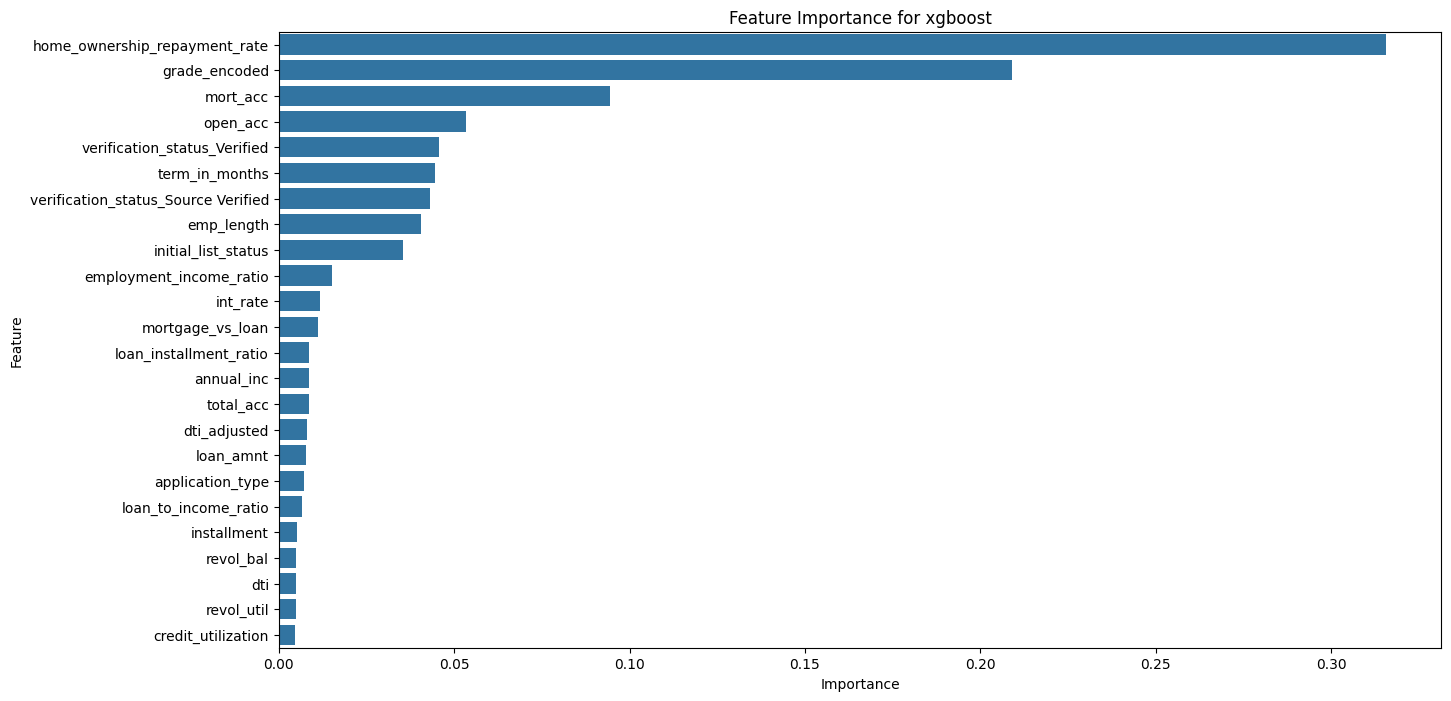

In [79]:
feature_importance(xgb, X_train, 'xgboost')

**Observation:**  
- Similar to Random Forest, **home_ownership_repayment_rate** and **grade_encoded** rank highly, confirming their strong influence on default predictions.  
- Unlike Logistic Regression, where **verification_status** was the top feature, XGBoost also places high importance on **mort_acc** and **emp_length**, showing it captures a wider range of patterns.  
- Even features with low importance receive some attention, reflecting XGBoost’s ability to incorporate many predictors without heavily penalizing weaker ones.

**Implication:**  
- XGBoost’s broader feature usage suggests it can combine different signals more effectively than a purely linear model.  
- The consistent prominence of **home_ownership_repayment_rate** and **grade_encoded** across models reinforces their critical role in default risk assessment.   


# Final Model Selection: XGBoost  
After testing multiple models, including Logistic Regression and Random Forest, XGBoost demonstrated superior performance. Due to its ability to handle complex data structures and provide consistent results, I selected XGBoost as the final model.

### Cross-Validation
To make sure the model is stable and works well on different data, I used cross-validation with XGBoost. Below, we calculate the cross-validation score and check its standard deviation.

In [ ]:
# Function to test a model with cross-validation
def cross_validate_model(name, model, X_train, y_train, scoring, cv):
    # Test the model on different data splits
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)
    # Print average score and variation
    print(f"{name} - Mean {scoring}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    # Return average and variation
    return np.mean(scores), np.std(scores)

# Empty dictionary for results
cv_results = {}

# Test XGBoost model
cv_results["XGBoost"] = cross_validate_model("XGBoost", xgb, X_train, y_train, 'f1', 5)
# Store results in a table
cv_results_df = pd.DataFrame(cv_results, index=['Mean F1-Score', 'Std Deviation']).T

# Show results
print("\nCross-Validation Results:")
print(cv_results)  # Raw dictionary
print(cv_results_df)  # Nice table

XGBoost - Mean f1: 0.8655 ± 0.0010

Cross-Validation Results:
{'XGBoost': (0.8654665651233175, 0.0009939803585903133)}
         Mean F1-Score  Std Deviation
XGBoost       0.865467       0.000994


### Cross-Validation Results for XGBoost

**XGBoost - Mean F1-Score: 0.8655 ± 0.0010**

**Observation:**
- The XGBoost model achieved a mean F1-Score of **0.8655** with a standard deviation of **0.0010** across 5-fold cross-validation.

**Implication:**
- The low standard deviation indicates that the model's performance is consistent across different subsets of the data.
- The high mean F1-Score indicates that the model performs well in distinguishing between the classes, making it a robust choice for predicting loan defaults.


## **Model Comparison**

                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.746979   0.759477  0.722352  0.740450  0.825123
Random Forest        0.767233   0.759687  0.781263  0.770324  0.857357
XGBoost              0.878522   0.965253  0.785128  0.865922  0.932223


<Figure size 1000x500 with 0 Axes>

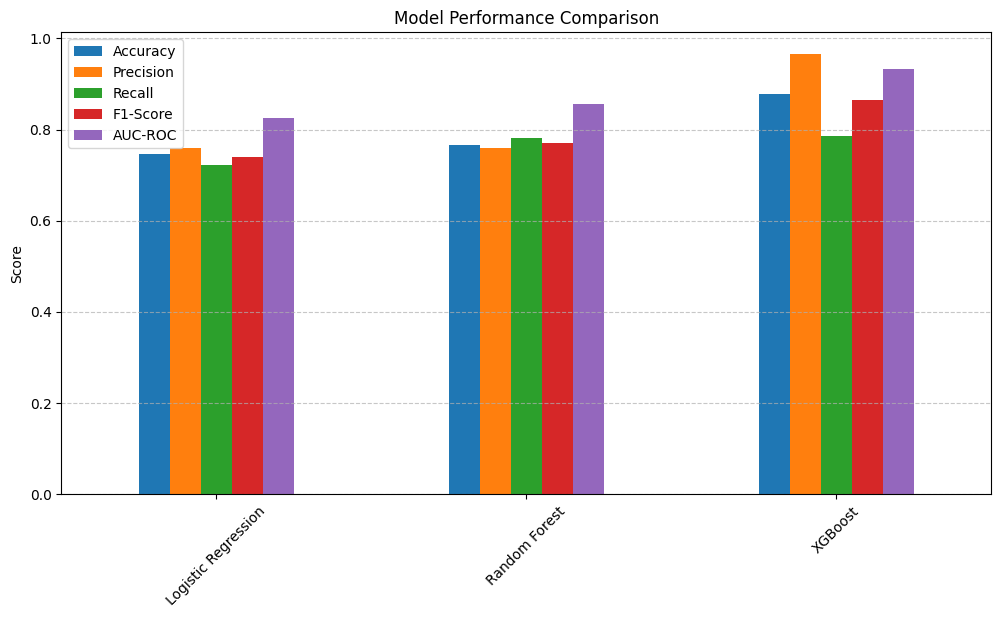

In [ ]:
# Initialize dictionary to store results
model_results = {}

# Define a function to evaluate each model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Store all metrics
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    }

# Evaluate Logistic Regression , Random Forest, and XGBoost
evaluate_model("Logistic Regression", lg, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)
evaluate_model("XGBoost", xgb, X_test, y_test)

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T  # Transpose for better readability
print(results_df)# Print comparison table
    
# Plot performance metrics
plt.figure(figsize=(10, 5))
results_df.plot(kind='bar', figsize=(14, 8))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Observations
1. **XGBoost** shows the best overall performance, with about 88% accuracy and a high AUC-ROC of around 0.93.
2. **Random Forest** does better than Logistic Regression but still trails behind XGBoost.
3. **Logistic Regression** is simpler and more interpretable, but its scores are lower compared to the other two models.

### Implications
- XGBoost seems to be the strongest candidate for our final model.
- The high AUC-ROC means XGBoost is good at separating defaulters from non-defaulters.

### Saving the XGBoost Model with Joblib

To save the trained XGBoost model for real-world usage, we can use the `joblib` library. This allows us to serialize the model and load it later for predictions without retraining. Below is the code to save the model:


In [91]:
import joblib 
joblib.dump(xgb, "AI_driven_loan_default_model.pkl")  
print("Model saved successfully!")

Model saved successfully!


## **Conclusion & Final Thoughts**

After evaluating three models—Logistic Regression, Random Forest, and XGBoost—XGBoost emerged as the best-performing model. It achieved the highest **accuracy (87.85%)**, **F1-score (86.59%)**, and **AUC-ROC (93.22%)**, making it the most reliable choice for predicting loan defaults. Its ability to balance precision and recall while effectively distinguishing between defaulters and non-defaulters makes it the ideal model for this task.

Random Forest also delivered strong results, with an AUC-ROC of **85.73%**, but it did not match XGBoost’s overall performance. Logistic Regression, while interpretable and efficient, had the lowest scores, highlighting its limitations in capturing complex patterns within the dataset.

Given these results, **XGBoost is selected as the final model for loan default prediction, providing the best trade-off between accuracy and robustness.**
